## [실습] 카이제곱 검정

In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

In [3]:
df = pd.DataFrame({"A":[18,1,8,7,10,9,10],
                  "B":[8,2,14,5,5,9,4],
                  "C":[4,1,3,4,9,5,4],
                  "D":[4,1,2,3,2,7,3],
                  "E":[3,1,3,1,1,1,1],
                  "F":[3,25,8,10,2,1,7]},
                 index=['as','price','performance', 'scalibility','design','stability','functionality'])

In [4]:
from scipy.stats import chi2_contingency

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

# chi-sqaure test 결과 출력
print(" chi2 test ")
print(' chi2: {0:0.3f}'.format(chi))
print(' p-value: {0:0.3f}'.format(pval))
print(' degree of freedom: {}'.format(dof))
print(' expected value: \n{}'.format(expected.round(1)))

 chi2 test 
 chi2: 98.274
 p-value: 0.000
 degree of freedom: 30
 expected value: 
[[11.   8.2  5.2  3.8  1.9  9.8]
 [ 8.5  6.4  4.1  3.   1.5  7.6]
 [10.5  7.8  5.   3.7  1.8  9.3]
 [ 8.3  6.2  3.9  2.9  1.4  7.3]
 [ 8.   6.   3.8  2.8  1.4  7.1]
 [ 8.8  6.6  4.2  3.1  1.5  7.8]
 [ 8.   6.   3.8  2.8  1.4  7.1]]


: p-value가 0.000으로 소비자가 느끼기에 제품에 차이가 있다고 느낄 것이다.

## [실습] One way ANOVA

In [8]:
# 선형모델 formula
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [9]:
df = pd.read_csv("/home/piai/test/Practice/data/ANOVA.csv", engine="python")
df.head(3)

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a


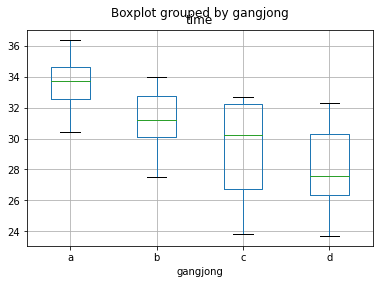

In [10]:
df.boxplot("time", by="gangjong")

In [11]:
# ANOVA 실행
# statsmodels 라이브러리를 사용
formula = 'time ~ C(gangjong)'
lm = ols(formula, df).fit()

print(anova_lm(lm))

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


결론 : 유의수준 5%에서 P값이 0.019 이므로 강종별 2차정령 시간에 차이가 있다고 할 수 있다.

## [실습] 상관분석

In [12]:
# 초코칩
df = pd.read_csv("/home/piai/test/Practice/data/correlation.csv", engine="python")
df.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


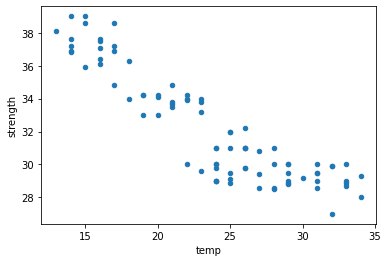

In [13]:
df.plot.scatter(x="temp",y="strength")

In [14]:
# Correlation Analysis 실행
corr, pval = stats.pearsonr(df["temp"], df["strength"])

# Correlation, p-value 결과 출력
print( "Correlation Analysis ")
print( 'corr: {0:0.3f}'.format(corr))
print( 'p-value : {0:0.3f}'.format(pval))

Correlation Analysis 
corr: -0.899
p-value : 0.000


:초코칩의 강도와 재료 반죽온도간에 "매우 강함 음의 상관성"이 있다고 볼 수 있다.

## [실습] 단순선형회귀 1

In [18]:
df_raw = pd.read_csv("/home/piai/test/Practice/data/correlation.csv", engine="python")
df_raw.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


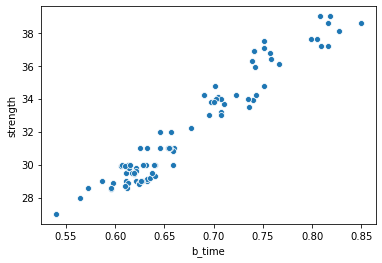

In [21]:
sns.scatterplot(data=df_raw, x="b_time", y="strength")

In [22]:
# 선형회귀모델
from sklearn.linear_model import LinearRegression

# 선형모델 formula(y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf

# 선형회귀분석:formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept)은 자동으로 추가됨
formula = "strength ~ b_time"
model = smf.ols(formula, data = df_raw)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           4.60e-51
Time:                        16:22:01   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1034      0.885      2.377      0.0

: R-squared 값은 0.933이다. 이는 93.3%의 설명력을 가지고 있다는 뜻이다. F 값이 굉장히 크다는 것을 알 수 있다. Prob(Omnibus)는 0.077로 0.05보다 크므로 정규성을 띈다고 볼 수 있다. Durbin-Watson 값은 1.395으로 2에 가까우므로, 자기상관이 없다고 볼 수 있다.

Strength = 2.1034 + 44.5520 * Bakingtime

## [실습] 단순선형회귀 2

In [23]:
df = pd.read_csv("/home/piai/test/Practice/data/correlation.csv", engine="python")
df.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


In [24]:
# Linear Regression 실행
reg_model = smf.ols("strength ~ Oven_TMP", data=df)

# 적합
reg_result = reg_model.fit()

# Simple Linear Regression 결과 출력
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1136
Date:                Wed, 11 Nov 2020   Prob (F-statistic):              0.737
Time:                        17:04:25   Log-Likelihood:                -223.88
No. Observations:                  86   AIC:                             451.8
Df Residuals:                      84   BIC:                             456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4190      5.271      5.771      0.0

: R-squared 값은 0.001이다. 이는 1%의 설명력을 가지고 있다는 뜻이다. F 값이 작다 것을 알 수 있다. Prob(Omnibus)는 0.000로 0.05보다 작으므로 정규성을 띄지 않는다고 판단할 수 있다. Durbin-Watson 값은 0.175으로 0에 가까우므로, 양의 자기상관관계를 띈다고 볼 수 있다.

strength = 30.4190 + 0.0056 * Oven_TMP